In [2]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
# findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
findspark.init('../spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('cleaning').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/21 05:00:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/21 05:00:55 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
df_1 = spark.read.csv('binary_data.csv', header=True)
df_2 = spark.read.csv('nominal_data.csv', header=True)

Drop rows containing na values

In [4]:
df_1 = df_1.dropna()
df_2 = df_2.dropna()

In [5]:
df_2.select(["Education"]).distinct().sort("Education").show()
df_2.select(["Income"]).distinct().sort("Income").show()

+---------+
|Education|
+---------+
|      1.0|
|     11.0|
|      2.0|
|     22.0|
|      3.0|
|     33.0|
|      4.0|
|     44.0|
|      5.0|
|     55.0|
|      6.0|
|     66.0|
+---------+

+------+
|Income|
+------+
|   1.0|
|  11.0|
|   2.0|
|  22.0|
|   3.0|
|  33.0|
|   4.0|
|  44.0|
|   5.0|
|  55.0|
|   6.0|
|  66.0|
|   7.0|
|  77.0|
|   8.0|
|  88.0|
+------+



In [6]:
from pyspark.sql.functions import col, when
df_2 = df_2.withColumn("Education", when(col("Education") % 11 == 0, col("Education") / 11)\
                       .otherwise(col("Education")))
df_2 = df_2.withColumn("Income", when(col("Income") % 11 == 0, col("Income") / 11)\
                       .otherwise(col("Income")))
df_2.select(["Education"]).distinct().sort("Education").show()
df_2.select(["Income"]).distinct().sort("Income").show()

+---------+
|Education|
+---------+
|      1.0|
|      2.0|
|      3.0|
|      4.0|
|      5.0|
|      6.0|
+---------+



+------+
|Income|
+------+
|   1.0|
|   2.0|
|   3.0|
|   4.0|
|   5.0|
|   6.0|
|   7.0|
|   8.0|
+------+



In [7]:
df_2.select(['Education', 'Income']).summary().show()

+-------+------------------+------------------+
|summary|         Education|            Income|
+-------+------------------+------------------+
|  count|            251910|            251910|
|   mean| 5.050398952006669| 6.053947838513755|
| stddev|0.9858212527289382|2.0709720333587414|
|    min|               1.0|               1.0|
|    25%|               4.0|               5.0|
|    50%|               5.0|               7.0|
|    75%|               6.0|               8.0|
|    max|               6.0|               8.0|
+-------+------------------+------------------+



In [8]:
yes = ['yes', 'YES', 'Y', 'Yes']
no = ['no', 'NO', 'N', 'No']

In [9]:
def convert_binary(column):
    return when(col(column).isin(no), 0) \
           .when(col(column).isin(yes), 1) \
           .otherwise(col(column))

for column in df_1.columns:
    df_1 = df_1.withColumn(column, convert_binary(column))

In [10]:
cols_1 = df_1.columns
df_1.select(cols_1[0:5]).summary().show()
df_1.select(cols_1[5:10]).summary().show()
df_1.select(cols_1[10:16]).summary().show()

+-------+------------------+------------------+-------------------+------------------+-------------------+
|summary|        Unnamed: 0|      Diabetes_012|             HighBP|          HighChol|          CholCheck|
+-------+------------------+------------------+-------------------+------------------+-------------------+
|  count|            249898|            249898|             249898|            249898|             249898|
|   mean|126854.92777453201|0.2967650801527023|0.42917510344220444|0.4243491344468543| 0.9627087851843552|
| stddev| 73224.61191999138|0.6980108551122761|0.49495940678687556|0.4942448017446194|0.18947486317379145|
|    min|                 0|                 0|                  0|                 0|                  0|
|    25%|           63436.0|               0.0|                0.0|               0.0|                1.0|
|    50%|          126845.0|               0.0|                0.0|               0.0|                1.0|
|    75%|          190272.0|         

+-------+-------------------+-------------------+--------------------+-------------------+------------------+
|summary|             Smoker|             Stroke|HeartDiseaseorAttack|       PhysActivity|            Fruits|
+-------+-------------------+-------------------+--------------------+-------------------+------------------+
|  count|             249898|             249898|              249898|             249898|            249898|
|   mean| 0.4431888210389839|0.04063657972452761| 0.09419843296064795| 0.7563926081841391|0.6343268053365774|
| stddev|0.49676299926812556| 0.1974472185625464|  0.2921051687824646|0.42925932467873734|0.4816193907804462|
|    min|                  0|                  0|                   0|                  0|                 0|
|    25%|                0.0|                0.0|                 0.0|                1.0|               0.0|
|    50%|                0.0|                0.0|                 0.0|                1.0|               1.0|
|    75%| 

+-------+-------------------+--------------------+-------------------+-------------------+------------------+------------------+
|summary|            Veggies|   HvyAlcoholConsump|      AnyHealthcare|        NoDocbcCost|          DiffWalk|               Sex|
+-------+-------------------+--------------------+-------------------+-------------------+------------------+------------------+
|  count|             249898|              249898|             249898|             249898|            249898|            249898|
|   mean| 0.8113670377514026|0.056230942224427566| 0.9510680357585896|0.08415033333600108|0.1683606911619941|0.4403076455193719|
| stddev|0.39121756128338386| 0.23036760997277336|0.21572624630332457| 0.2776136940763594|0.3741870242616193|0.4964250285492702|
|    min|                  0|                   0|                  0|                  0|                 0|                 0|
|    25%|                1.0|                 0.0|                1.0|                0.0|       

Remove files "binary_data.csv" and "nominal_data.csv" before re-write.

# 3.3 Data Construction

In [11]:
df_1 = df_1.withColumn("Diabetes_012", when(col("Diabetes_012") == 2, 1).otherwise(0))
df_1 = df_1.withColumnRenamed("Diabetes_012", "Diabetes")
df_1.select(['Diabetes']).show()

+--------+
|Diabetes|
+--------+
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       1|
|       0|
|       1|
|       0|
|       0|
|       1|
|       0|
|       0|
|       0|
|       1|
|       0|
|       0|
|       0|
+--------+
only showing top 20 rows



### plot Diabetes

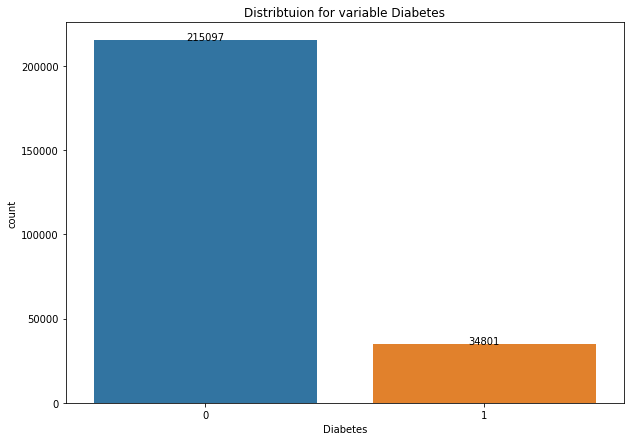

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_1_pd = df_1.toPandas()
fig, ax1 = plt.subplots(figsize=(10,7))
graph = sns.countplot(ax=ax1,x='Diabetes', data=df_1_pd)
graph.set_title("Distribtuion for variable Diabetes")
graph.set_xticklabels(graph.get_xticklabels())
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
    df_1_pd['Diabetes'].value_counts()[i],ha="center")
    i += 1

# Data Integration

In [13]:
print(df_1.columns)
print(df_2.columns)

['Unnamed: 0', 'Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
['Unnamed: 0', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


In [14]:
df = df_1.join(df_2,['Unnamed: 0'],how='inner')
df = df.drop('Unnamed: 0')
print(df.columns)
print((df.count(), len(df.columns)))

['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


(248158, 22)


## Overview of df

In [15]:
cols = df.columns
df.select(cols[0:5]).summary().show()
df.select(cols[5:10]).summary().show()
df.select(cols[10:15]).summary().show()
df.select(cols[15:20]).summary().show()
df.select(cols[20:22]).summary().show()

+-------+------------------+-------------------+------------------+-------------------+-------------------+
|summary|          Diabetes|             HighBP|          HighChol|          CholCheck|             Smoker|
+-------+------------------+-------------------+------------------+-------------------+-------------------+
|  count|            248158|             248158|            248158|             248158|             248158|
|   mean|0.1392782017907946| 0.4291540067215242|0.4244312091490099| 0.9626729744759387|0.44328613222221325|
| stddev|0.3462372992286103|0.49495639448078005|0.4942573644002231|0.18956229448902903|0.49677412540009785|
|    min|                 0|                  0|                 0|                  0|                  0|
|    25%|                 0|                0.0|               0.0|                1.0|                0.0|
|    50%|                 0|                0.0|               0.0|                1.0|                0.0|
|    75%|                 0|

+-------+-------------------+--------------------+------------------+------------------+-------------------+
|summary|             Stroke|HeartDiseaseorAttack|      PhysActivity|            Fruits|            Veggies|
+-------+-------------------+--------------------+------------------+------------------+-------------------+
|  count|             248158|              248158|            248158|            248158|             248158|
|   mean|0.04062331256699361| 0.09423431845840151|0.7563084808871767|0.6343297415356346| 0.8113540566896896|
| stddev|0.19741635214208297|  0.2921550198705227|0.4293095681723561| 0.481618578599036|0.39122789798836505|
|    min|                  0|                   0|                 0|                 0|                  0|
|    25%|                0.0|                 0.0|               1.0|               0.0|                1.0|
|    50%|                0.0|                 0.0|               1.0|               1.0|                1.0|
|    75%|          

+-------+-------------------+-------------------+-------------------+-------------------+-------------------+
|summary|  HvyAlcoholConsump|      AnyHealthcare|        NoDocbcCost|           DiffWalk|                Sex|
+-------+-------------------+-------------------+-------------------+-------------------+-------------------+
|  count|             248158|             248158|             248158|             248158|             248158|
|   mean|0.05627060179401833|  0.951063435391968|0.08416815093609717|0.16834839094447893|0.44038072518314947|
| stddev|0.23044399571741836|0.21573586814000487| 0.2776403859843156|0.37417612751071855| 0.4964338175161265|
|    min|                  0|                  0|                  0|                  0|                  0|
|    25%|                0.0|                1.0|                0.0|                0.0|                0.0|
|    50%|                0.0|                1.0|                0.0|                0.0|                0.0|
|    75%| 

+-------+-----------------+------------------+------------------+------------------+-----------------+
|summary|              BMI|           GenHlth|          MentHlth|          PhysHlth|              Age|
+-------+-----------------+------------------+------------------+------------------+-----------------+
|  count|           248158|            248158|            248158|            248158|           248158|
|   mean|28.38195020914095|2.5120125081601237|3.1870985420578823|4.2451019108793595|8.033289275381007|
| stddev|6.615209367850987| 1.068682456475187|7.4163522619524285| 8.723033003741383|3.053839350782109|
|    min|             12.0|               1.0|               0.0|               0.0|              1.0|
|    25%|             24.0|               2.0|               0.0|               0.0|              6.0|
|    50%|             27.0|               2.0|               0.0|               0.0|              8.0|
|    75%|             31.0|               3.0|               2.0|        

+-------+------------------+------------------+
|summary|         Education|            Income|
+-------+------------------+------------------+
|  count|            248158|            248158|
|   mean| 5.050282481322383| 6.053429669807139|
| stddev|0.9857779169349572|2.0711041243215864|
|    min|               1.0|               1.0|
|    25%|               4.0|               5.0|
|    50%|               5.0|               7.0|
|    75%|               6.0|               8.0|
|    max|               6.0|               8.0|
+-------+------------------+------------------+



## Save the resulting data

In [20]:
df.write.option("header", True).option("sep", ",").csv("cleaned.csv")

In [ ]:
# spark.catalog.clearCache()
# import os
# os.remove('binary_data.csv')
# os.remove('nominal_data.csv')

In [ ]:
# df_1.write.mode('overwrite').csv('binary_data.csv')
# df_2.write.mode('overwrite').csv('nominal_data.csv')

In [ ]:
# output_path = 'binary_data.csv'

# df_1.write.csv(path=output_path, mode='overwrite', header=True)